In [2]:
import sys
sys.path.append("../")  # 确保根目录在 sys.path 中
from PIL import Image
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import src.postProcess as PostProcess

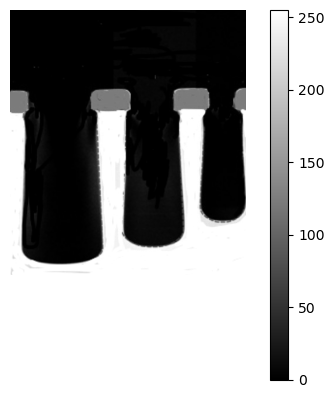

(635, 404)


In [7]:
# 读取图像为灰度模式
# image = Image.open("./hard_mask_KLA3.jpg").convert("L")
image = Image.open("./sf_o2_etch2.jpg").convert("L")
# 转换为 NumPy 数组
etchProfile = np.array(image)

plt.imshow(etchProfile, cmap="gray")  # 指定灰度色彩映射
plt.colorbar()  # 显示颜色条（可选）
# plt.title("Grayscale Image")
plt.axis("off")  # 不显示坐标轴
plt.show()

print(etchProfile.shape)

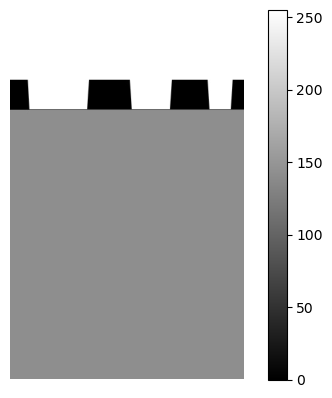

(591, 373)


In [8]:
# 读取图像为灰度模式
# image = Image.open("./hard_mask_KLA3.jpg").convert("L")
image = Image.open("./sf_o2_mask.jpg").convert("L")
# 转换为 NumPy 数组
HardMasK = np.array(image)

plt.imshow(HardMasK, cmap="gray")  # 指定灰度色彩映射
plt.colorbar()  # 显示颜色条（可选）
# plt.title("Grayscale Image")
plt.axis("off")  # 不显示坐标轴
plt.show()

print(HardMasK.shape)

In [9]:
etchProfile.shape[1]/ etchProfile.shape[0]

0.6362204724409449

In [10]:
HardMasK.shape[1]/ HardMasK.shape[0]

0.6311336717428088

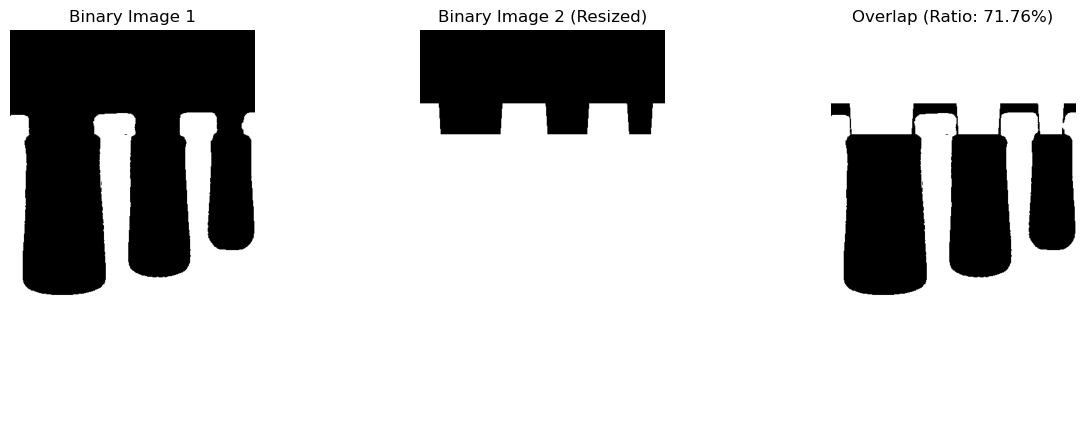

0.7175684103843455

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取两张图像
img1_path = "./sf_o2_etch2.jpg"
img2_path = "./sf_o2_mask.jpg"

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 调整图像大小，使它们具有相同的尺寸
height, width = img1.shape[:2]
img2_resized = cv2.resize(img2, (width, height))

# 转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

# 二值化处理
_, binary1 = cv2.threshold(gray1, 80, 255, cv2.THRESH_BINARY)
_, binary2 = cv2.threshold(gray2, 180, 255, cv2.THRESH_BINARY)

binary2 = cv2.bitwise_not(binary2).astype(np.uint8)
binary1 = binary1.astype(np.uint8)

# binary1 = (binary1 > 128).astype(np.uint8) * 255
# binary2 = (binary2 > 128).astype(np.uint8) * 255
# 计算重叠区域
intersection = binary1 == binary2  # 计算交集

overlap_ratio = np.sum(intersection) / (intersection.shape[0]*intersection.shape[1])


overlap = intersection*255
# overlap_ratio = np.sum(overlap) / np.sum(binary2)  # 计算相对于 mask 的重叠度

# 显示结果
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(binary1, cmap='gray')
axes[0].set_title("Binary Image 1")

axes[1].imshow(binary2, cmap='gray')
axes[1].set_title("Binary Image 2 (Resized)")

axes[2].imshow(overlap, cmap='gray')
axes[2].set_title(f"Overlap (Ratio: {overlap_ratio:.2%})")

for ax in axes:
    ax.axis("off")

plt.show()

# 输出重叠率
overlap_ratio
